# AI-econ 期末報告
## 107258025 經碩一 黃允亭
### 題目：房價預測

實驗目的：

應用課堂所學 K-means, ANN, SVR, Decision Trees, PCA等概念，透過模型訓練和比較得出房價預測結果，
過程中，因認為房價會受地區和建物用途影響，故採用cluster方法將六萬筆資料先行分為7類，
然後切割訓練集資料(train_X, test_X, train_y, test_y)以便進行交叉驗證,
再建立ExtraTreesRegressor, lightgbm, SVR 和ANN 四種模型對組資料進行訓練，
最後用交叉驗證集評分決定最適模型，用此模型對測試集資料進行預測，合併組資料輸出得到結果，共計建立28種模型。

實驗設計：


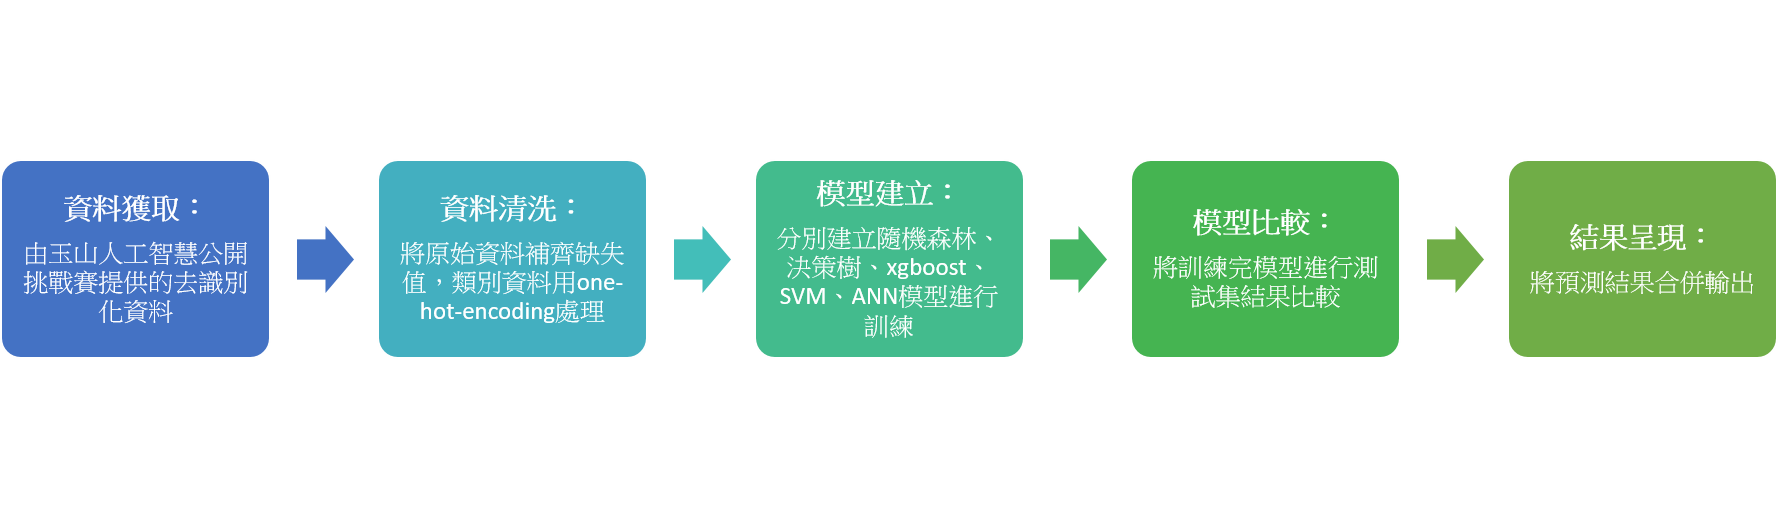

In [2]:
Image(filename="C:\\Users\\yunting\\1.png")

#### 一、	資料介紹：
資料來源為玉山人工智慧挑戰賽提供的去識別化資料，包含兩個資料集。

1.train資料集包含233個特徵(含標籤total_price)、六萬筆資料，用來訓練以及交叉驗證模型；

2.test資料集包含232個特徵(不含標籤total_price)、一萬筆資料，用來預測未來結果。

圖為部分欄位示範說明。


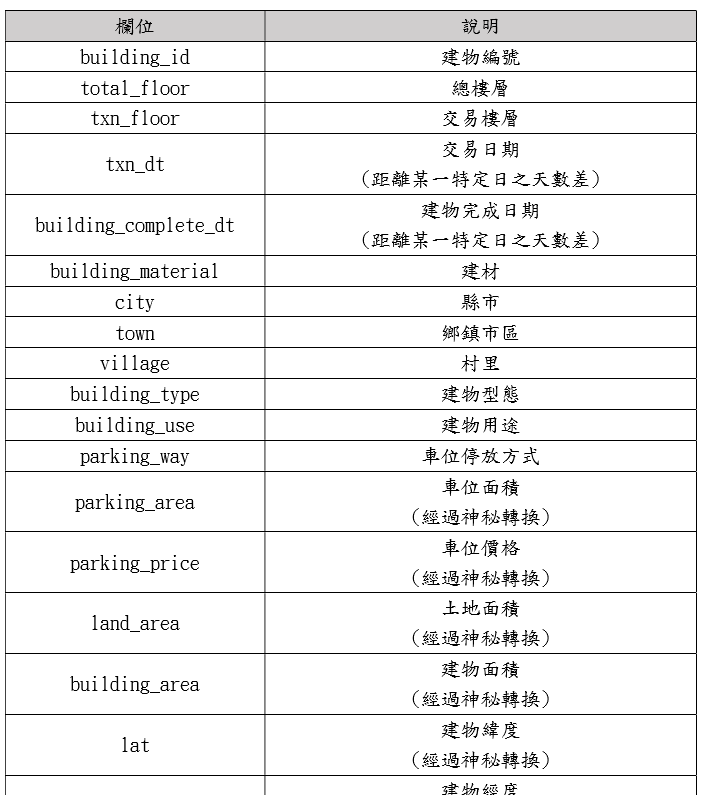

In [4]:
Image(filename="C:\\Users\\yunting\\5.png")

#### 二、資料清洗
1.缺失值處理

首先，從train資料集與test資料集中抓出有缺失值的欄位進行補齊。

發現存在缺失值的欄位：
   - village_income_median(所在里年收入中位數)
   - parking_area(車位面積)
   - parking_price'(車位價格)
   - txn_floor(交易樓層)
   
補缺失值方式：
   - 所在里年收入中位數的缺失用所有樣本的中位數補齊
   - 車位面積缺失視為車位不存在，面積用0補齊
   - 車位價格缺失視為車位不存在，面積用0補齊
   - 交易樓層缺失視為整棟出售(透天厝)，樓層用0.5補齊
   
2.類別變數處理

由兩個資料集的原始資料欄位可知有以下五種類別資料
    - building_material(建材)
    - building_type(建物型態)
    - parking_way(車位停放方式)
    - building_use(建物用途)
    - address(地址)：此為原始資料中的city, town, village合併的變數(預先用excel合併)。
    
先將前三者用one-hot-encoding處理，將dummy分別與train和test合併,且丟棄原類別變數。

在處理過程中，發現兩資料集類別變數的dummy數不同，所以讓程式處理方式為，若有不同的column，留下train資料集columns、捨棄test資料集columns。

至此，資料清洗完畢。


#### 三、模型建立
1.資料分群

試過把整組資料拿來設模型，預測結果不如預期。故認為資料可能存在不同的群聚型態(如受地址、建物用途影響)

因此決定用cluster方法將資料分7群後，再建立模型比較，依每組最適用的模型去預測，最後輸出。


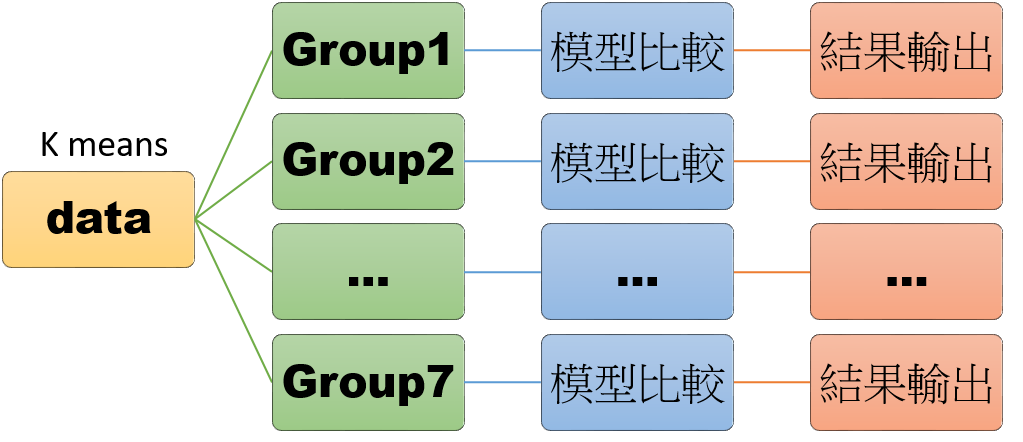

In [10]:
Image(filename="C:\\Users\\yunting\\2.png", width=800, height=800)

2.各組訓練流程

為增加模型效率，想在訓練開始前用PCA概念降微度，採用了e.RandomForestRegressor：隨機森林模型選取重要特徵。


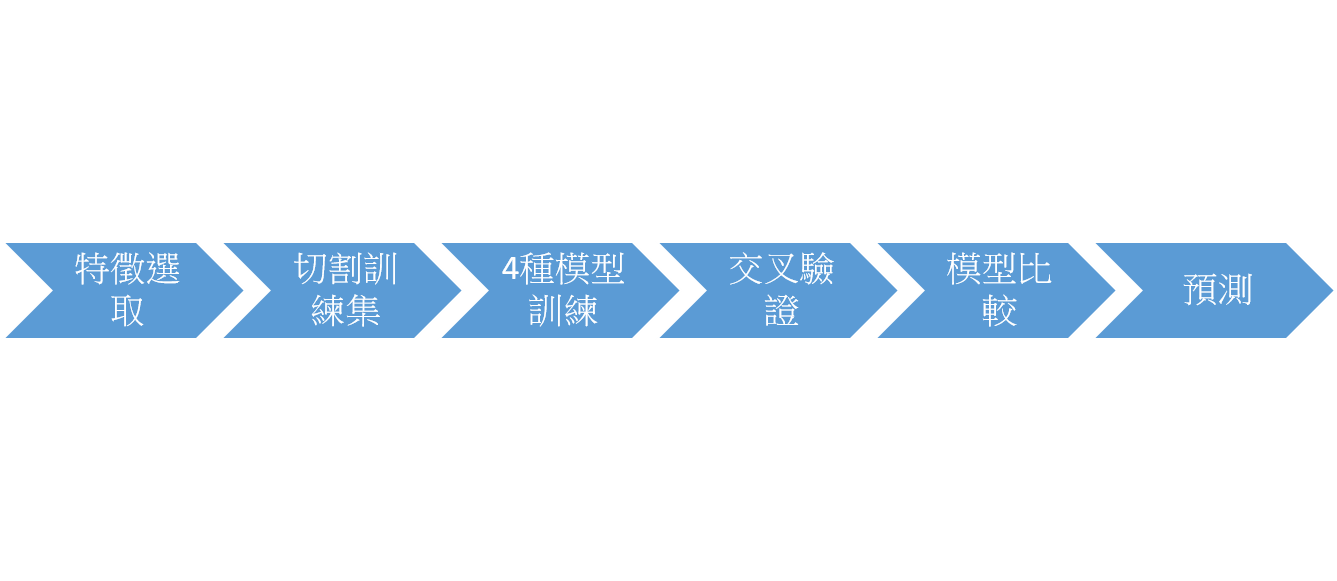

In [6]:
Image(filename="C:\\Users\\yunting\\3.png")

特徵選取完畢後，切割train資料集為train(訓練集)和test(驗證集)，然後建立模型。


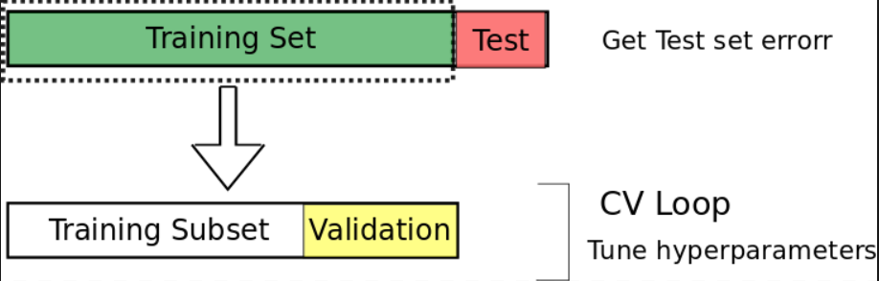

In [11]:
Image(filename="C:\\Users\\yunting\\4.png", width=700, height=700)


欲建立四種模型：
    - a.ExtraTreesRegressor：為集成回歸，概念類似隨機森林。
    - b.lightgbm：隨機森林加入Regularization概念，優化xgboost模型。
    - c.SVR：用SVM模型做回歸。
    - d.ANN：自定義ANN，設為四層神經網路，每隱藏層神經元設為64。
    

#### 四、模型比較

程式編成用function()方式，編寫出能分別對各組資料建立四種模型進行訓練、交叉驗證以及提供最適預測結果的model，自定義所得模型交叉驗證集最高分數即為最適模型，用最適模型對測試集進行預測，將結果暫存。最後以迴圈方式跑過7組模型，將預測結果合併，得到outcome。

#### 五、結果呈現

發現每個群組有不同適用的演算法，ANN, extree和lightgbm都有所表現，其中SVR模型結果呈現不佳，可能是SVM不適用於處理大樣本問題。

結果呈現於頁尾，共得test資料集10000筆資料的房市預測價格。

#### 六、future work

此份報告盡力於應用課堂所學，對於特徵工程、結果準確度以及是否存在overfitting的問題還有待改良，包括分群方式、ANN的架構、參數的決定以及其他演算法的應用都可能得到更準確的結果。

# ----------------------------------------------------------------------------------------------------------------

### code

#### 一、資料介紹

In [1]:
from IPython.display import Image

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\new\\train_address.csv')
test = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\new\\test_address.csv')
sub = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\initial\\submit_test.csv')

In [3]:
print("train資料集維度：", data.shape)
print("test資料集維度：", test.shape)
print("train資料集前十筆資料：")
data.head(10)

train資料集維度： (60000, 233)
test資料集維度： (10000, 232)
train資料集前十筆資料：


,building_id,building_material,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,18674,4,3,2,6271,2,NaN,NaN,...,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,LgwzgklNvy4QCtq5,8,18800,5,1,2,7885,2,NaN,NaN,...,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,ucIR2NLLsC3T650L,8,19289,4,1,2,6028,2,NaN,NaN,...,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06
3,jre1pJhcQj91Kdky,8,20385,24,0,2,18325,0,NaN,81138.889760,...,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07
4,rQpYpY9nRG7X5mmr,1,20657,2,4,2,6880,2,NaN,NaN,...,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05
5,HmW2MkrwafmceWAH,8,18394,5,1,2,6576,2,NaN,NaN,...,58,1,314,1,2725,1,7417,1,61.109908,3.964520e+05
6,ITYyim3zx6DQyCoF,8,20474,15,0,2,16559,0,NaN,61488.568950,...,65,1,252,1,11515,1,26867,1,196.690224,8.510296e+06
7,KFrxqaWZaLynrOae,8,18185,8,3,2,11934,1,NaN,6721.823057,...,64,1,181,1,11456,1,19514,1,66.780308,1.678426e+06
8,ZiK0gY7A0BvwZ8OV,8,18794,5,1,2,7640,2,NaN,NaN,...,116,1,203,1,2666,1,7014,1,40.349486,9.870214e+05
9,QnytA7FbgaVxIDuP,8,19927,10,3,2,9863,0,NaN,61488.568950,...,118,1,288,1,12945,1,32664,1,102.955013,1.181540e+07


In [4]:
id = data['building_id']
train = data.iloc[:, 1:-1]
y = data['total_price']

In [5]:
test_id = test['building_id']
testX = test.iloc[:, 1:]

#### 二、資料清洗
1.缺失值處理

從原始資料中抓出有缺失值的欄位進行補齊

發現存在缺失值的欄位：
   - village_income_median(所在里年收入中位數)
   - parking_area(車位面積)
   - parking_price'(車位價格)
   - txn_floor(交易樓層)
   


In [6]:
train_columnslist = train.columns.tolist()
train_no_na = train.dropna()
train_no_na_col=train.dropna(axis=1).columns.tolist()
na_set=set(train_columnslist)-set(train_no_na_col)
train_list_na = train[list(na_set)]
train_list_na.describe()

,village_income_median,parking_area,parking_price,txn_floor
count,58858.000000,3103.000000,1.393500e+04,44098.000000
mean,674.840175,7.211837,5.025058e+04,5.389269
std,140.653083,20.453902,3.973488e+04,3.944618
min,411.000000,0.000000,0.000000e+00,1.000000
25%,583.000000,3.738412,2.827238e+04,3.000000
50%,642.000000,5.758023,4.379195e+04,4.000000
75%,729.000000,7.180619,6.148857e+04,7.000000
max,1851.000000,967.370868,1.020404e+06,28.000000


In [7]:
testX_columnslist = testX.columns.tolist()
testX_no_na = testX.dropna()
testX_no_na_col=testX.dropna(axis=1).columns.tolist()
na_set=set(testX_columnslist)-set(testX_no_na_col)
testX_list_na = testX[list(na_set)]
testX_list_na.describe()

,village_income_median,parking_area,parking_price,txn_floor
count,9816.000000,500.000000,2290.000000,7361.000000
mean,673.334760,6.645918,50600.021884,5.421682
std,139.364209,6.671072,38948.800177,3.954859
min,442.000000,0.000000,0.000000,1.000000
25%,582.000000,3.738412,28272.384430,3.000000
50%,641.000000,5.758023,43791.947140,4.000000
75%,728.000000,7.180619,61488.568950,7.000000
max,1851.000000,103.895538,326960.895400,27.000000


其中：
   - 所在里年收入中位數的缺失用所有樣本的中位數補齊
   - 車位面積缺失視為車位不存在，面積用0補齊
   - 車位價格缺失視為車位不存在，面積用0補齊
   - 交易樓層缺失視為整棟出售(透天厝)，樓層用0.5補齊

In [8]:
train["village_income_median"] = train["village_income_median"].fillna(train['village_income_median'].median())
train["parking_area"]=train["parking_area"].fillna(0)
train["parking_price"]=train["parking_price"].fillna(0)
train["txn_floor"]=train["txn_floor"].fillna(train["txn_floor"].mean())
train[["village_income_median","parking_area","parking_price","txn_floor"]].describe()

,village_income_median,parking_area,parking_price,txn_floor
count,60000.000000,60000.000000,6.000000e+04,60000.000000
mean,674.215117,0.372972,1.167070e+04,5.389269
std,139.380337,4.917360,2.858202e+04,3.381719
min,411.000000,0.000000,0.000000e+00,1.000000
25%,584.000000,0.000000,0.000000e+00,3.000000
50%,642.000000,0.000000,0.000000e+00,5.389269
75%,728.000000,0.000000,0.000000e+00,6.000000
max,1851.000000,967.370868,1.020404e+06,28.000000


In [9]:
testX["village_income_median"] = testX["village_income_median"].fillna(testX['village_income_median'].median())
testX["parking_area"]=testX["parking_area"].fillna(0)
testX["parking_price"]=testX["parking_price"].fillna(0)
testX["txn_floor"]=testX["txn_floor"].fillna(train["txn_floor"].mean())
testX[["village_income_median","parking_area","parking_price","txn_floor"]].describe()

,village_income_median,parking_area,parking_price,txn_floor
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,672.739800,0.332296,11587.405011,5.413128
std,138.144348,2.078252,28273.278873,3.393091
min,442.000000,0.000000,0.000000,1.000000
25%,583.000000,0.000000,0.000000,3.000000
50%,641.000000,0.000000,0.000000,5.389269
75%,726.000000,0.000000,0.000000,6.000000
max,1851.000000,103.895538,326960.895400,27.000000


2.類別變數處理

由原始資料欄位可知有以下五種類別資料
    - building_material(建材)
    - building_type(建物型態)
    - parking_way(車位停放方式)
    - building_use(建物用途)
    - address(地址)：此為原始資料中的city, town, village合併的變數
    
先將前三者用one-hot-encoding處理，將dummy與train合併且丟棄原類別變數,令為X


In [10]:
train_list_dummy = ['building_material','building_type','parking_way']
dummies = []
for s in train_list_dummy:
    dummies.append(pd.get_dummies(train[s], prefix = s))
X = pd.concat([train]+dummies, axis = 1)
X = X.drop(columns = train_list_dummy, axis = 1)
print("資料總數：", X.shape[0])
print("資料特徵數：", X.shape[1])
print("顯示前十筆資料：")
X.head(10)

資料總數： 60000
資料特徵數： 245
顯示前十筆資料：


,txn_dt,total_floor,building_use,building_complete_dt,parking_area,parking_price,txn_floor,land_area,address,building_area,...,building_material_10,building_material_11,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,parking_way_0,parking_way_1,parking_way_2
0,18674,4,2,6271,0.0,0.000000,3.000000,18.144460,213343132,3.418175,...,0,0,0,0,0,1,0,0,0,1
1,18800,5,2,7885,0.0,0.000000,5.000000,11.387227,7180921,4.041309,...,0,0,0,1,0,0,0,0,0,1
2,19289,4,2,6028,0.0,0.000000,1.000000,21.426802,71801544,5.584279,...,0,0,0,1,0,0,0,0,0,1
3,20385,24,2,18325,0.0,81138.889760,13.000000,11.387227,213433350,13.563031,...,0,0,1,0,0,0,0,1,0,0
4,20657,2,2,6880,0.0,0.000000,5.389269,61.306524,2110263,4.688108,...,0,0,0,0,0,0,1,0,0,1
5,18394,5,2,6576,0.0,0.000000,4.000000,14.803422,2162950,3.623131,...,0,0,0,1,0,0,0,0,0,1
6,20474,15,2,16559,0.0,61488.568950,8.000000,11.387227,7841591,7.726227,...,0,0,1,0,0,0,0,1,0,0
7,18185,8,2,11934,0.0,6721.823057,4.000000,11.387227,12611331,7.974018,...,0,0,0,0,0,1,0,0,1,0
8,18794,5,2,7640,0.0,0.000000,1.000000,13.106100,21493077,4.041309,...,0,0,0,1,0,0,0,0,0,1
9,19927,10,2,9863,0.0,61488.568950,2.000000,11.387227,71802122,7.480303,...,0,0,0,0,0,1,0,1,0,0


In [11]:
testX_list_dummy = ['building_material','building_type','parking_way']
testX_dummies = []
for s in testX_list_dummy:
    testX_dummies.append(pd.get_dummies(testX[s], prefix = s))
testXX = pd.concat([testX]+testX_dummies, axis = 1)
testXX = testXX.drop(columns = testX_list_dummy, axis = 1)
print("資料總數：", testXX.shape[0])
print("資料特徵數：", testXX.shape[1])
print("顯示前十筆資料：")
testXX.head(10)

資料總數： 10000
資料特徵數： 244
顯示前十筆資料：


,txn_dt,total_floor,building_use,building_complete_dt,parking_area,parking_price,txn_floor,land_area,address,building_area,...,building_material_10,building_material_11,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,parking_way_0,parking_way_1,parking_way_2
0,18634,2,2,1857,0.0,0.00000,5.389269,40.317789,1366160,3.418175,...,0,0,0,0,0,0,1,0,0,1
1,20199,10,2,16011,0.0,0.00000,2.000000,18.144460,74843,7.726227,...,0,0,0,0,0,1,0,0,0,1
2,19769,4,10,18294,0.0,0.00000,5.389269,47.912742,1252645,12.170581,...,0,0,0,0,0,0,1,0,0,1
3,20479,19,0,17837,0.0,0.00000,16.000000,2.222000,7204461,2.252256,...,1,0,0,0,1,0,0,0,0,1
4,18164,13,2,13272,0.0,0.00000,3.000000,11.387227,31692390,5.813985,...,0,0,1,0,0,0,0,0,0,1
5,18632,4,2,15464,0.0,0.00000,5.389269,37.242047,12216556,11.623768,...,0,0,0,0,0,0,1,0,0,1
6,19144,14,2,16590,0.0,61488.56895,11.000000,13.106100,710237,8.475077,...,0,0,1,0,0,0,0,1,0,0
7,19452,5,2,7124,0.0,0.00000,3.000000,14.803422,131482924,3.830869,...,0,0,0,1,0,0,0,0,0,1
8,19045,2,2,12634,0.0,0.00000,5.389269,64.242549,171441712,10.283420,...,0,0,0,0,0,0,1,0,0,1
9,19220,13,10,17351,0.0,0.00000,10.000000,4.181031,7132783,2.438421,...,0,0,0,0,1,0,0,0,0,1


In [12]:
clean_merge_data = pd.concat([X, testXX],axis=0)
clean_train = clean_merge_data.iloc[:60000, :]
clean_test = clean_merge_data.iloc[60000:, :]
clean_test.fillna(0, inplace = True)
merge_traintest = pd.concat([clean_train, clean_test], axis = 0)
merge_traintest.dropna(axis = 1, inplace = True)
ready_train = merge_traintest.iloc[:60000, :]
ready_test = merge_traintest.iloc[60000:, :]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


#### 三、模型建立

1.如何分群?

取特徵address(地址)和building_use(建物用途)做分群，

採K-means方法將資料分成7群

In [13]:
from sklearn.cluster import KMeans

In [14]:
clust = pd.concat([ready_train['address'], ready_train['building_use']],axis=1)
ks = KMeans(n_clusters = 7).fit(clust)
labels = pd.DataFrame((ks.labels_).tolist())

In [15]:
#testXX labels
test_clust = pd.concat([ready_test['address'], ready_test['building_use']],axis=1)
test_labels = ks.predict(test_clust)
test_labels = pd.DataFrame(test_labels.tolist())

In [16]:
X_addlabels = pd.concat([ready_train, labels, y],axis=1)
X_addlabels.head()

,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,III_index_1000,...,parking_way_2,total_floor,town_area,town_population,town_population_density,txn_dt,txn_floor,village_income_median,0,total_price
0,0,3,91,3728,17,1,37,1861,42.635964,1,...,1,4,1.4161,24219,17103,18674,3.000000,572.0,3,6.476038e+05
1,1,1,29,7380,4,1,11,2512,7.157464,1,...,1,5,23.1373,551480,23835,18800,5.000000,550.0,1,3.321452e+06
2,0,1,235,7971,17,0,73,2695,86.589412,1,...,1,4,23.1373,551480,23835,19289,1.000000,625.0,2,9.570885e+06
3,0,1,50,3904,3,1,5,2157,45.508654,1,...,0,24,14.7523,139259,9440,20385,13.000000,950.0,3,1.421501e+07
4,0,0,1,1449,0,0,0,134,546.047664,1,...,1,2,71.0400,112397,1582,20657,5.389269,536.0,1,7.627120e+05


In [17]:
#test id & label concat
test_addlabels = pd.concat([ready_test,test['building_id'], test_labels],axis=1)
test_addlabels.head()

,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,III_index_1000,...,parking_way_2,total_floor,town_area,town_population,town_population_density,txn_dt,txn_floor,village_income_median,building_id,0
0,0,2,57,5422,6,0,15,1277,56.238977,1,...,1,2,21.8424,122155,5593,18634,5.389269,714.0,X5gsdTWGS3W7JJQB,1
1,0,1,7,1366,1,0,1,292,55.204531,1,...,1,10,191.4508,114926,600,20199,2.000000,583.0,BTshNOJyKHnT2YIT,1
2,0,0,41,4480,0,0,0,1204,572.904189,1,...,1,4,62.7034,274819,4383,19769,5.389269,641.0,dhdymr0lV8N5kZOT,1
3,0,9,276,10687,25,3,94,4540,47.064014,1,...,1,19,5.7138,222585,38956,20479,16.000000,653.0,VEwyGGMcD56w5BOc,1
4,0,0,30,808,9,0,15,504,130.624446,1,...,1,13,22.8283,38708,1696,18164,3.000000,624.0,wmUeMoJZfsqaSX9b,6


資料分群結果如下

In [18]:
labels

,0
0,3
1,1
2,2
3,3
4,1
5,1
6,1
7,6
8,6
9,2


2.訓練流程

import sklean, keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split
from sklearn import  preprocessing , metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from xgboost import XGBRFRegressor 
import xgboost as xgb
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
import lightgbm as lgb

Using TensorFlow backend.


架構ANN模型並自訂評分機制

In [20]:
import keras.backend as K
def r2(y_true, y_pred):
    a = K.square(y_pred - y_true)
    b = K.sum(a)
    c = K.mean(y_true)
    d = K.square(y_true - c)
    e = K.sum(d)
    f = 1 - b/e
    return f

In [36]:
def ANN(train_X , test_X , train_y, test_y, Xtest_group_de):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim = n))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mae',r2])
    history = model.fit(train_X, train_y, batch_size=10, epochs=200, verbose=0)

    pred_test_y = model.predict(test_X)
    global pred_test_acc
    pred_test_acc = r2_score(test_y, pred_test_y)
    
    pred_train_y = model.predict(train_X)
    global pred_train_acc 
    pred_train_acc = r2_score(train_y, pred_train_y)
    
    global pred_pred_y
    pred_pred_y = model.predict(Xtest_group_de)

    return pred_test_acc, pred_train_acc, pred_pred_y

用function()包裝比較四種模型

In [25]:
def model(number):
    
    group_bool = X_addlabels[0] == number
    group = X_addlabels[group_bool]
    print('原維度:', group.shape)
    Xgroup = group.iloc[:, :-2]
    ygroup = group.iloc[:, -1]
    
    test_group_bool = test_addlabels[0] == number
    test_group = test_addlabels[test_group_bool]
    print('測試集維度：', test_group.shape)
    Xtest_group = test_group.iloc[:, :-2]
    
    '''feature select'''
    forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
    forest_reg = forest.fit(Xgroup, ygroup)
    model_select = SelectFromModel(forest_reg, prefit=True)
    X_forest = model_select.transform(Xgroup)
    X_forest = Xgroup[Xgroup.columns[model_select.get_support()]]
    input_dim = X_forest.shape
    global n 
    n = input_dim[1]
    print('特徵選取後維度:', X_forest.shape)
    
    Xtest_group_de = pd.DataFrame(model_select.transform(Xtest_group))
    print('測試集特徵選取後維度：', Xtest_group_de.shape)
    
    
    '''CV'''
    train_X , test_X , train_y, test_y = train_test_split (X_forest, ygroup, test_size = 0.3)
    
    '''使用模型如下'''
    extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
    gbm = lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.05,n_estimators=20)
    #xgbreg = xgb.XGBRegressor(n_estimators=400,subsample=0.88,max_depth=3,colsample_bytree=0.88, min_child_weight=2,reg_alpha=0.01,objective='reg:squarederror')
    svmreg = svm.SVR()
    
    ### extree ###
    extree_model = extree.fit(train_X, train_y)
    extree_model.score(train_X, train_y)
    extree_model.score(test_X, test_y)
    
    extree_Xtest_group_pre = extree_model.predict(Xtest_group_de)
    
    ### lightgbm ###
    gbm_model = gbm.fit(train_X, train_y)
    gbm_model.score(train_X, train_y)
    gbm_model.score(test_X, test_y)
    
    gbm_Xtest_group_pre = gbm_model.predict(Xtest_group_de)
    
    ### xgboost ###
    #xgbreg_model = xgbreg.fit(train_X, train_y)
    #xgbreg_model.score(train_X, train_y)
    #xgbreg_model.score(test_X, test_y)
    #Xtest_group_de_forxgb = np.array(Xtest_group_de)
    #xgbreg_Xtest_group_pre = xgbreg_model.predict(Xtest_group_de_forxgb)
    
    ### svm regression ###
    svmreg_model = svmreg.fit(train_X, train_y)
    svmreg_model.score(train_X, train_y)
    svmreg_model.score(test_X, test_y)
    
    svmreg_Xtest_group_pre = svmreg_model.predict(Xtest_group_de)
    
    ### ANN ###
    ANN(train_X , test_X , train_y, test_y, Xtest_group_de)
    
    '''保留最適模型'''
    dict1 = {'extree_model':extree_model.score(test_X, test_y), 'gbmreg_model':gbm_model.score(test_X, test_y), 'svmreg_model':svmreg_model.score(test_X, test_y), 'ann_model':pred_test_acc}
    dict2 = {extree_model.score(test_X, test_y):['extree_model', extree_model.score(train_X, train_y), extree_Xtest_group_pre],
             gbm_model.score(test_X, test_y):['gbmreg_model', gbm_model.score(train_X, train_y), gbm_Xtest_group_pre],
             #xgbreg_model.score(test_X, test_y):['xgbreg_model', xgbreg_model.score(train_X, train_y), xgbreg_Xtest_group_pre],
             svmreg_model.score(test_X, test_y):['svmreg_model', svmreg_model.score(train_X, train_y), svmreg_Xtest_group_pre],
             pred_test_acc:['ann_model', pred_train_acc, pred_pred_y]}

    best_value = max(dict1.values())
    best_key = dict2[best_value][0]
    print('最適模型為：', best_key)
    print('訓練集評分:', dict2[best_value][1])
    print('交叉驗證集評分:', best_value)
    
    '''group預測輸出'''
    group_pre = pd.DataFrame(dict2[best_value][2])
    group_id = pd.DataFrame(test_group['building_id'])
    group_id.reset_index(inplace = True)
    test_sub = pd.concat([group_id, group_pre], axis = 1)
    
    return (test_sub)

預測結果合併輸出

In [27]:
outcome = pd.DataFrame()
for group in range(7):
    print('group'+str(group))
    outcome = outcome.append(model(group))
    print('---------------------------------'+str(group)+'---------------------------------')

group0
原維度: (7992, 247)
測試集維度： (1321, 247)
特徵選取後維度: (7992, 13)
測試集特徵選取後維度： (1321, 13)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


最適模型為： extree_model
訓練集評分: 0.9995179652214439
交叉驗證集評分: 0.88780768991024
---------------------------------0---------------------------------
group1
原維度: (18065, 247)
測試集維度： (3043, 247)
特徵選取後維度: (18065, 23)
測試集特徵選取後維度： (3043, 23)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


最適模型為： extree_model
訓練集評分: 0.9999999987401945
交叉驗證集評分: 0.765451528198615
---------------------------------1---------------------------------
group2
原維度: (10285, 247)
測試集維度： (1687, 247)
特徵選取後維度: (10285, 33)
測試集特徵選取後維度： (1687, 33)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


最適模型為： extree_model
訓練集評分: 0.9990269535453952
交叉驗證集評分: 0.9074970226949926
---------------------------------2---------------------------------
group3
原維度: (4257, 247)
測試集維度： (727, 247)
特徵選取後維度: (4257, 3)
測試集特徵選取後維度： (727, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


最適模型為： extree_model
訓練集評分: 0.9999100196390477
交叉驗證集評分: 0.8848208571473797
---------------------------------3---------------------------------
group4
原維度: (2796, 247)
測試集維度： (450, 247)
特徵選取後維度: (2796, 6)
測試集特徵選取後維度： (450, 6)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


最適模型為： ann_model
訓練集評分: 0.8549161775431063
交叉驗證集評分: 0.9229377107986065
---------------------------------4---------------------------------
group5
原維度: (707, 247)
測試集維度： (123, 247)
特徵選取後維度: (707, 23)
測試集特徵選取後維度： (123, 23)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


最適模型為： extree_model
訓練集評分: 1.0
交叉驗證集評分: 0.8341805455483913
---------------------------------5---------------------------------
group6
原維度: (15898, 247)
測試集維度： (2649, 247)
特徵選取後維度: (15898, 29)
測試集特徵選取後維度： (2649, 29)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


最適模型為： gbmreg_model
訓練集評分: 0.5022670475873738
交叉驗證集評分: 0.7808445546997855
---------------------------------6---------------------------------


結果呈現

In [28]:
outcome['total_price'] = outcome[0]

In [32]:
submit = outcome.drop(columns = [0])
submit

,index,building_id,total_price
0,7,wXjeI38bYDMJJwZC,6.674808e+06
1,14,jykBfhh3vdeFUi3H,3.456922e+06
2,20,a016eMAVQKnfwMnt,1.711010e+07
3,23,EgAVWOVxD1Jy5YkE,1.200242e+06
4,30,Eg8c7ZRbL0gyAEAb,1.991620e+06
5,48,CVz3pN9nF05lPP5u,1.450310e+06
6,58,tMEj7u0YNW1xuLxf,8.770711e+05
7,65,j1eSrtTGv0lNjzBU,4.289343e+07
8,69,iFtImxGUUlXbkD9b,1.099853e+07
9,74,VP1NDCBMrjip2Bnd,8.236010e+06


In [39]:
submit.to_csv('pred_price.csv')

### END